In [1]:
#setup
from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import copy
import gensim

sns.set_theme()
plt.rcParams["figure.figsize"] = (10,8)
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
from main import nlp_pipeline_result

In [3]:
# #data_ner = nlp_pipeline_result(disable_ner = False)
# #data.to_csv('data/data_ner.csv')

#data_non_ner = nlp_pipeline_result()
#data_non_ner['n_lemmas'] = data_non_ner['Lemmas'].str.split().str.len()

# #data_non_ner.to_csv('data/data.csv',index = False)

In [4]:
data = pd.read_csv('data/data.csv')

In [5]:
#for i in range(0,50,10):
 # display(data[i:i+10])

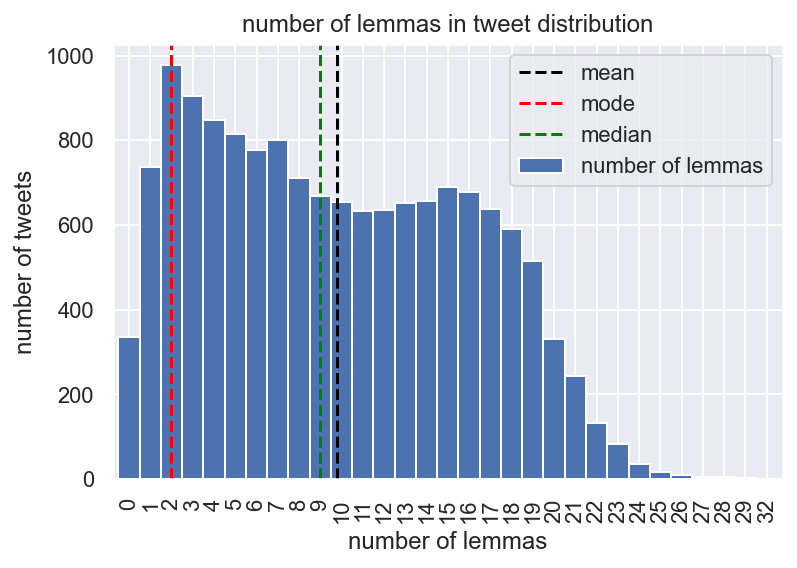

In [6]:
plt.figure()
data['n_lemmas'].value_counts().sort_index().plot(kind="bar",width=1,label='number of lemmas')
plt.axvline(x = data['n_lemmas'].mean(),label='mean',color = 'black',linestyle = '--')
plt.axvline(x = data['n_lemmas'].mode()[0],label='mode',color = 'red',linestyle = '--')
plt.axvline(x = data['n_lemmas'].median(),label='median',color = 'green',linestyle = '--')
plt.legend()
plt.title('number of lemmas in tweet distribution')
plt.xlabel('number of lemmas')
plt.ylabel('number of tweets')
plt.show()

In [7]:
data = data[data['n_lemmas']>=3]
print('Number of tweets in DataFrame after removing short tweets:', len(data))

Number of tweets in DataFrame after removing short tweets: 12733


In [8]:
tweets_corpus = data["Lemmas"].tolist()
tweets_corpus = list(set(tweets_corpus))
tweets_corpus = [el.split() for el in tweets_corpus]

# display(tweets_corpus)

In [9]:
gensim.corpora.dictionary

<module 'gensim.corpora.dictionary' from 'c:\\users\\manun\\documents\\mis proyectos\\nlp-with-spanish-politicians-tweets\\venv\\lib\\site-packages\\gensim\\corpora\\dictionary.py'>

In [10]:
token_dic = gensim.corpora.Dictionary(tweets_corpus)

# Filter token dictionary

no_below = 5  # Minimum number of documents to keep a term in the dictionary
no_above = .4  # Maximum proportion of documents in which a term can appear to be kept in the dictionary


# BOW: Transform list of tokens into list of tuples (token id, token # of occurrences)

tweets_corpus_bow = [token_dic.doc2bow(doc) for doc in tweets_corpus]

tweets_corpus_bow

[[(0, 1),
  (1, 1),
  (2, 2),
  (3, 1),
  (4, 2),
  (5, 1),
  (6, 1),
  (7, 1),
  (8, 1),
  (9, 1),
  (10, 1),
  (11, 1)],
 [(12, 1), (13, 1), (14, 1), (15, 1)],
 [(16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1)],
 [(24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1)],
 [(31, 1), (32, 1), (33, 1)],
 [(34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 1)],
 [(8, 1),
  (50, 1),
  (51, 1),
  (52, 1),
  (53, 1),
  (54, 1),
  (55, 1),
  (56, 1),
  (57, 1),
  (58, 1),
  (59, 1),
  (60, 1),
  (61, 1)],
 [(62, 1), (63, 1), (64, 1)],
 [(65, 1),
  (66, 1),
  (67, 1),
  (68, 1),
  (69, 1),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 2),
  (80, 2),
  (81, 1)],
 [(19, 1), (82, 1), (83, 1), (84, 1), (85, 1), (86, 1)],
 [(49, 2), (80, 1), (87, 1), (88, 1), (89, 1), (90, 1), (91, 1)],
 [(92,

In [17]:
from gensim.models.wrappers import LdaMallet
import os

os.environ['MALLET_HOME'] = r'C:/mallet'
mallet_path = 'C:/mallet/bin/mallet'

ldamallet = LdaMallet(mallet_path, corpus=tweets_corpus_bow, num_topics=20, id2word=token_dic, alpha=5, iterations=100)

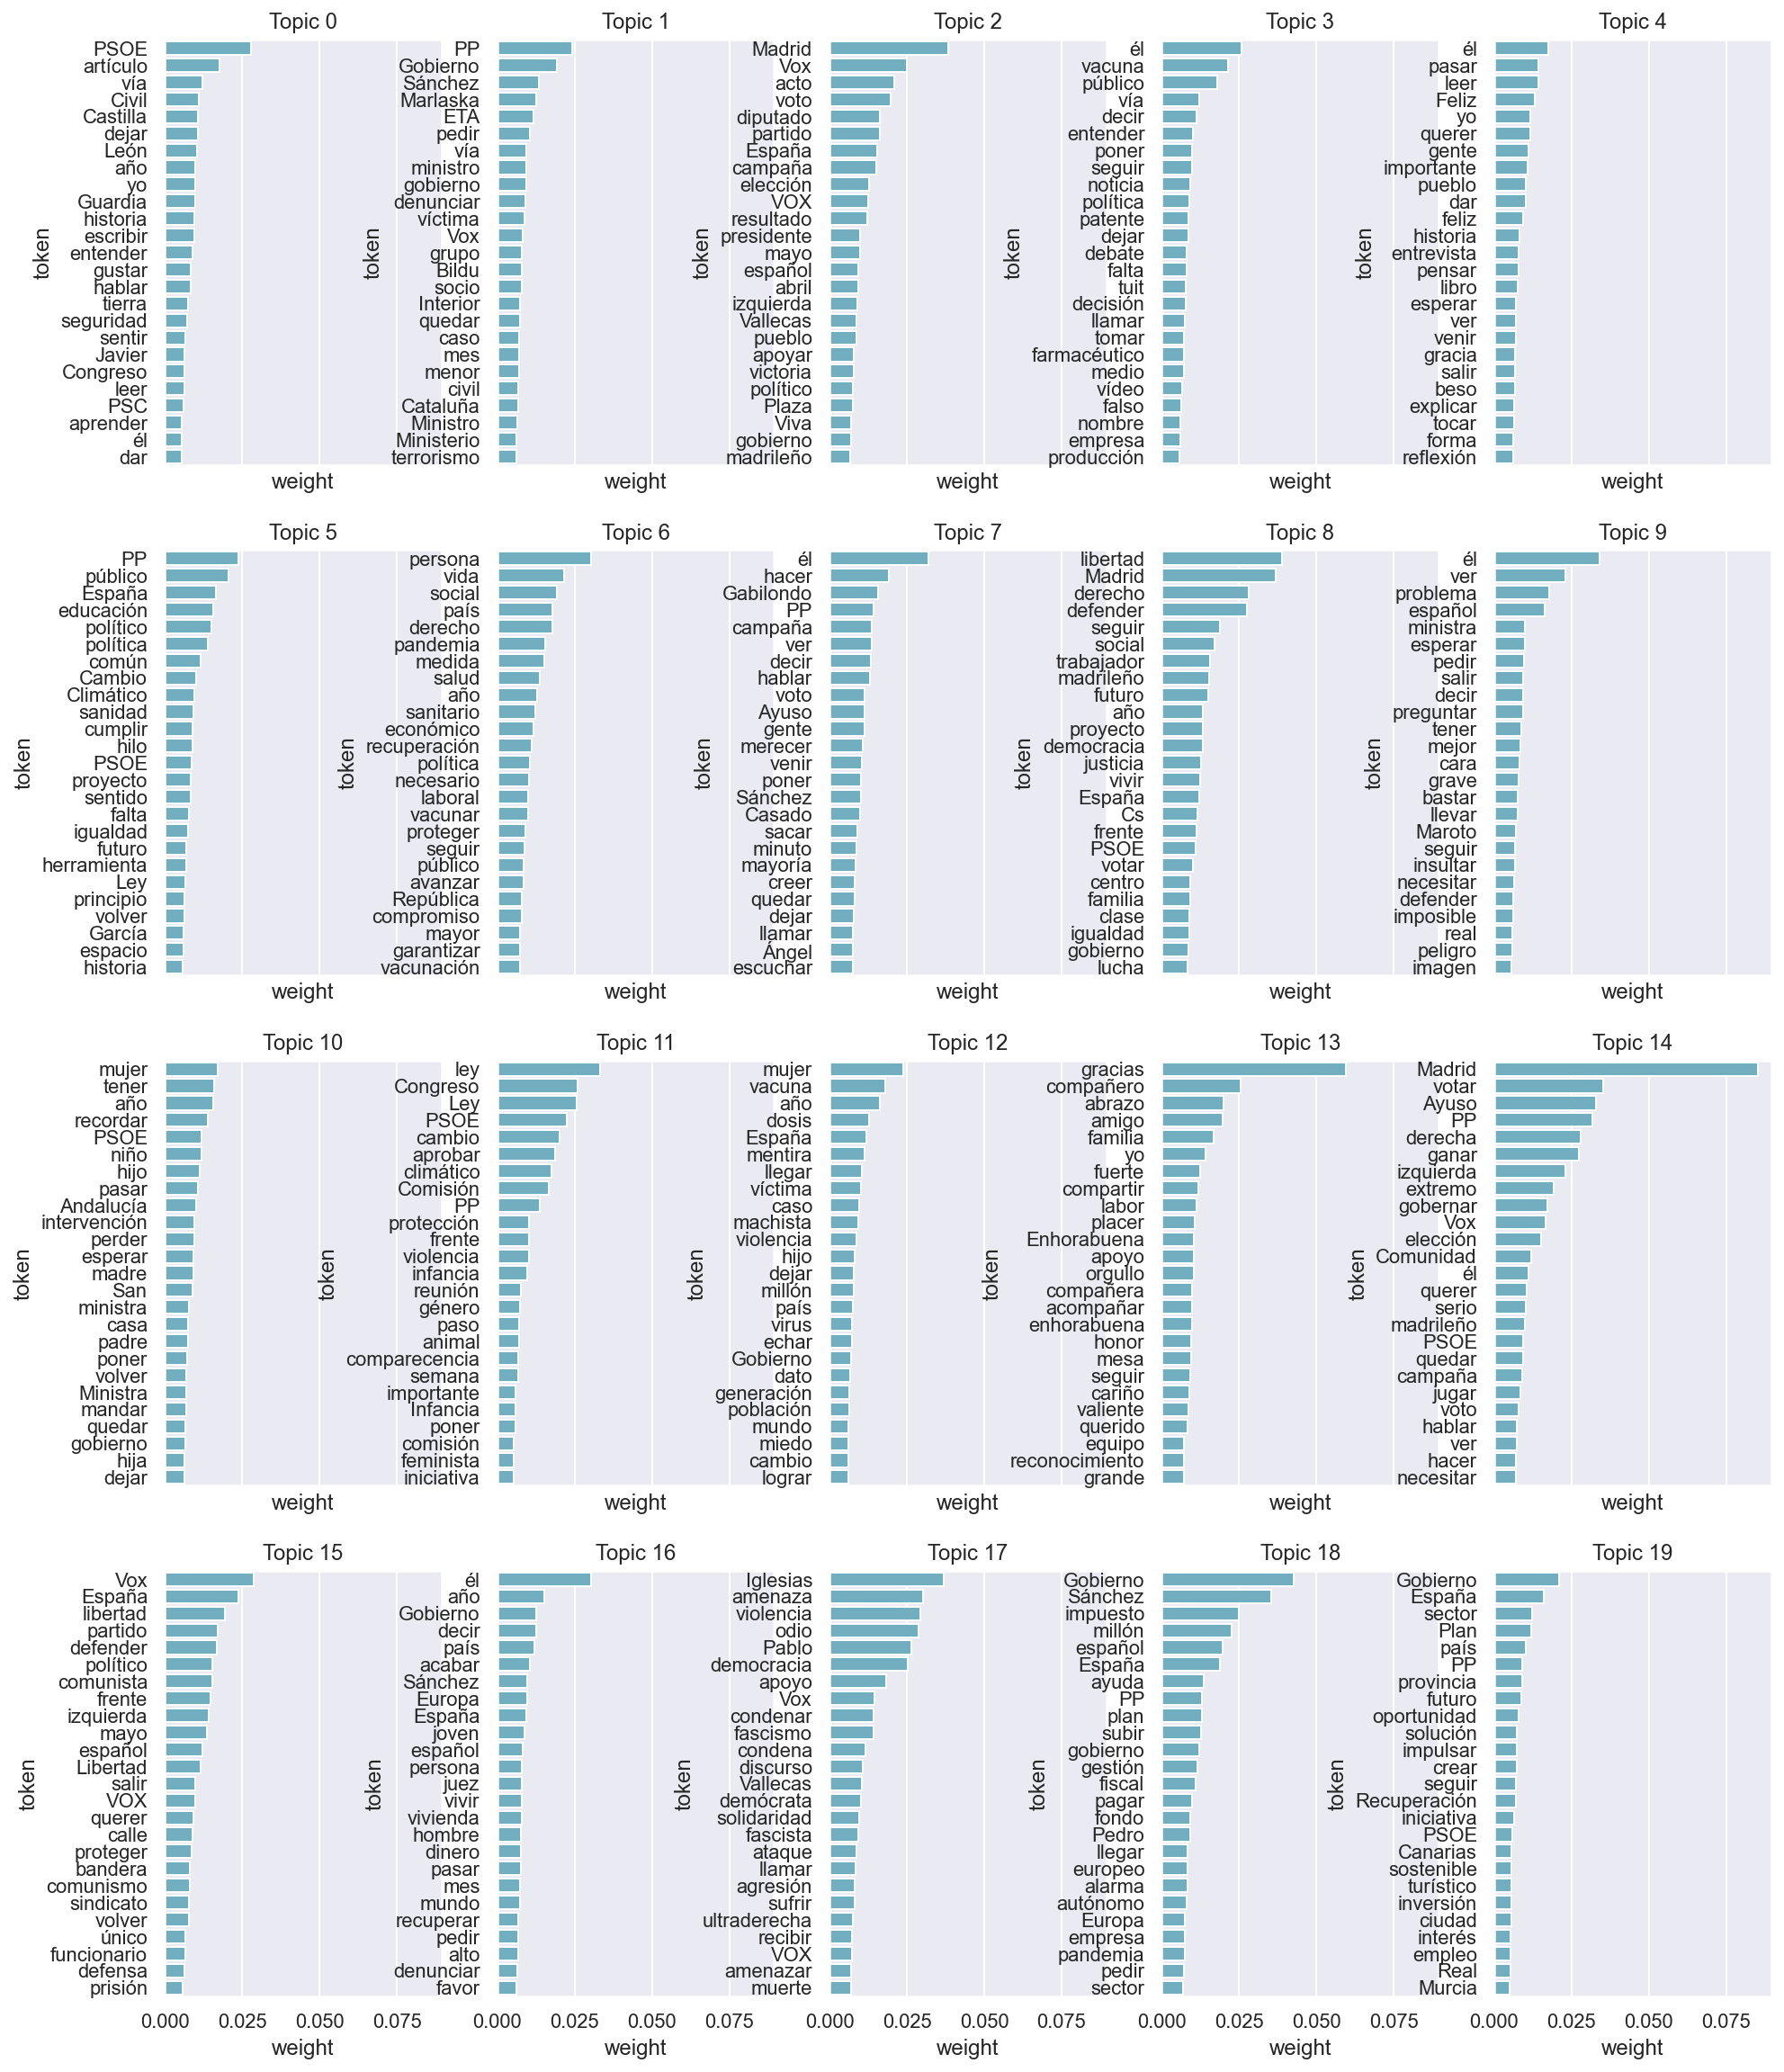

In [18]:
topn = 25

fig, axes = plt.subplots(4, 5, figsize=(16, 20), sharex=True)

for i in range(5):

    # Build a dataframe with columns 'token' and 'weight' for topic i
    df = pd.DataFrame(ldamallet.show_topic(i, topn=topn), columns=['token','weight'])
    sns.barplot(x='weight', y='token', data=df, color='c', orient='h', ax=axes[0][i])
    axes[0][i].set_title('Topic ' + str(i))
    # Build a dataframe with columns 'token' and 'weight' for topic i + 5
    df = pd.DataFrame(ldamallet.show_topic(i+5, topn=topn), columns=['token','weight'])
    sns.barplot(x='weight', y='token', data=df, color='c', orient='h', ax=axes[1][i])
    axes[1][i].set_title('Topic ' + str(i+5))
    # Build a dataframe with columns 'token' and 'weight' for topic i + 10
    df = pd.DataFrame(ldamallet.show_topic(i+10, topn=topn), columns=['token','weight'])
    sns.barplot(x='weight', y='token', data=df, color='c', orient='h', ax=axes[2][i])
    axes[2][i].set_title('Topic ' + str(i+10))
    # Build a dataframe with columns 'token' and 'weight' for topic i + 15
    df = pd.DataFrame(ldamallet.show_topic(i + 15, topn=topn), columns=['token','weight'])
    sns.barplot(x='weight', y='token', data=df, color='c', orient='h', ax=axes[3][i])
    axes[3][i].set_title('Topic ' + str(i + 15))
    
plt.show()